In [1]:
import os
import sys
import pathlib
import subprocess

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

####################################################################
### NOTE: CHANGE PATHS FOR NRSS, PYHYPER, AND CURRENT REPOSITORY ###
####################################################################

sys.path.append('/home/devon/Documents/Github/NRSS/')
sys.path.append('/home/devon/Documents/Github/PyHyperScattering/src/')
sys.path.append('/home/devon/Documents/Github/Fibril/')
sys.path.append('/home/devon/Documents/Github/Fibril/src/')

import experiments.c2c_dist.params as p
from Common.files import make_output_dir, move

from Morphology.FibrilGenerator import generate_morphology
from Morphology.FibrilPostProcessor import process_morphology
import Simulation.cyrsoxs as cyrsoxs 

%load_ext autoreload
%autoreload 2

Imports failed.  Are you running on a machine with proper libraries for databroker, tiled, etc.?
CyRSoXS
Size of Real               : 4
Maximum Number Of Material : 32
 __________________________________________________________________________________________________
|                                 Thanks for using CyRSoXS                                        |
|--------------------------------------------------------------------------------------------------|
|  Copyright          : Iowa State University                                                      |
|  License            : NIST                                                                       |
|  Acknowledgement    : ONR MURI                                                                   |
|                                                                                                  |
|  Developed at Iowa State University in collaboration with NIST                                   |
|                         

In [2]:
sys.path

['/home/devon/Documents/Github/Fibril/experiments/c2c_dist',
 '/home/devon/miniconda3/envs/nrss/lib/python39.zip',
 '/home/devon/miniconda3/envs/nrss/lib/python3.9',
 '/home/devon/miniconda3/envs/nrss/lib/python3.9/lib-dynload',
 '',
 '/home/devon/miniconda3/envs/nrss/lib/python3.9/site-packages',
 '/home/devon/Documents/Github/NRSS/',
 '/home/devon/Documents/Github/PyHyperScattering/src/',
 '/home/devon/Documents/Github/Fibril/',
 '/home/devon/Documents/Github/Fibril/src/']

In [12]:
##########################################
### DEFINE EXPERIMENT SWEEP PARAMETERS ###
##########################################

exp1 = {
    "45": 45,
    # "60": 60,
    # "75": 75,
    # "90": 90
}

# SINGLE VARIABLE SWEEP
for exp1_name, exp1_val in exp1.items():

    dir_name = f'{exp1_name}_nm'
    save_dir = make_output_dir(p.base_path, dir_name)

    print(save_dir)

    # Adjust input parameters based on experiment values
    p.c2c_dist_nm = exp1_val

    # Build morphology 
    # fibgen = generate_morphology(p)
    # data = process_morphology(fibgen, p)
    cyrsoxs.create_inputs(p)

    # Simulate scattering
    cyrsoxs.run(p, save_dir=save_dir)

    # cyrsoxs.cleanup(p)

    # data/xspectra_refractive_indices/interp_P3HT_database_kkcalc_merge.txt
    # data/xspectra_refractive_indices/interp_P3HT_database_kkcalc_merge.txt


/home/devon/Documents/Github/Fibril/experiments/c2c_dist/45_nm
[WARNING] : No value corresponding to HDF5DirName found. Setting to default
[WARNING] : No value corresponding to Algorithm found. Setting to default
[WARNING] : No value corresponding to MaxStreams found. Setting to default
Input Data : [OK] 
NumMaterial          : 3
Dimensions [Z Y X]   : [256 512 512]
PhysSize             : 2 nm 
E Rotation Angle     : 0 : 1 : 360
Morphology Type      : EulerAngles
Morphology Order     : ZYX
Energies simulated   : [280 ]
Windowing Type       : NONE
Rotation Mask        : 0
Interpolation Type   : Trilinear interpolation
HDF Output Directory : HDF5
Scatter Approach     : Partial
Algorithm            : CommunicationMinimizing
 __________________________________________________________________________________________________
|                                 Thanks for using CyRSoXS                                        |
|--------------------------------------------------------------------

In [16]:
raw_data = cyrsoxs.load(save_dir)
para, perp, AR = cyrsoxs.get_para_perp_AR(raw_data, q_range=p.q_range)

Finished reading 1 energies. Time required: 0:00:00.001582


  0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
para

<xarray.DataArray (energy: 1, q: 130)>
array([[1.05135675e+01, 8.44679955e+00, 7.27950459e+00, 5.74999597e+00,
        4.57519689e+00, 3.83456466e+00, 3.31209540e+00, 2.23814995e+00,
        1.69563817e+00, 1.18430302e+00, 8.54022497e-01, 7.20352065e-01,
        5.43221011e-01, 4.21352272e-01, 3.70570268e-01, 3.01697078e-01,
        2.66872219e-01, 2.38801526e-01, 2.32436706e-01, 2.34818152e-01,
        2.36532264e-01, 2.28933915e-01, 2.32405170e-01, 2.16171681e-01,
        1.92409689e-01, 1.74305427e-01, 1.59458504e-01, 1.50943712e-01,
        1.39268052e-01, 1.30281743e-01, 1.23595514e-01, 1.10615070e-01,
        9.96811460e-02, 8.68140250e-02, 7.72143986e-02, 6.68970361e-02,
        6.14970077e-02, 5.62258818e-02, 5.04377058e-02, 4.54351825e-02,
        4.25565874e-02, 4.13211224e-02, 3.72548002e-02, 3.44862868e-02,
        3.29190556e-02, 2.99904203e-02, 2.93682185e-02, 2.84541452e-02,
        2.69169333e-02, 2.45966437e-02, 2.23587365e-02, 2.10384365e-02,
        1.98426519e-02, 1.96667122e-02, 1.82314367e-02, 1.70543864e-02,
        1.61029895e-02, 1.55908775e-02, 1.46499469e-02, 1.41465946e-02,
        1.39360743e-02, 1.31133319e-02, 1.22018092e-02, 1.13642783e-02,
        1.02721030e-02, 1.01161122e-02, 9.72708922e-03, 9.01072373e-03,
        8.51364822e-03, 8.19597070e-03, 7.60389098e-03, 7.35791258e-03,
        7.06018728e-03, 6.84968172e-03, 6.40078090e-03, 6.16912953e-03,
        5.84464654e-03, 5.61981400e-03, 5.56127090e-03, 5.38794810e-03,
        5.10312752e-03, 4.78751544e-03, 4.68178900e-03, 4.35553699e-03,
        4.14099289e-03, 4.19880751e-03, 3.95127031e-03, 3.73570600e-03,
        3.35588616e-03, 3.21141006e-03, 3.18534068e-03, 3.13507200e-03,
        2.92997337e-03, 2.83905102e-03, 2.77416383e-03, 2.76060221e-03,
        2.61491022e-03, 2.39604740e-03, 2.23770980e-03, 2.19772756e-03,
        2.17869788e-03, 2.11129763e-03, 1.96571333e-03, 1.89387755e-03,
        1.90411760e-03, 1.80117781e-03, 1.69830969e-03, 1.66019145e-03,
        1.62001011e-03, 1.57375215e-03, 1.52521907e-03, 1.51347829e-03,
        1.46029843e-03, 1.39541529e-03, 1.40278922e-03, 1.41686860e-03,
        1.27034475e-03, 1.19368308e-03, 1.20714111e-03, 1.13756918e-03,
        1.08112058e-03, 1.01673147e-03, 9.81592865e-04, 9.59417853e-04,
        9.41716699e-04, 9.46388278e-04, 9.05577024e-04, 9.05266751e-04,
        8.78072037e-04, 8.66390686e-04]])
Coordinates:
  * q        (q) float64 0.1043 0.1105 0.1166 0.1227 ... 0.8837 0.8898 0.8959
  * energy   (energy) float64 280.0

<xarray.DataArray 'energy' (energy: 1)>
array([280.])
Coordinates:
  * energy   (energy) float64 280.0


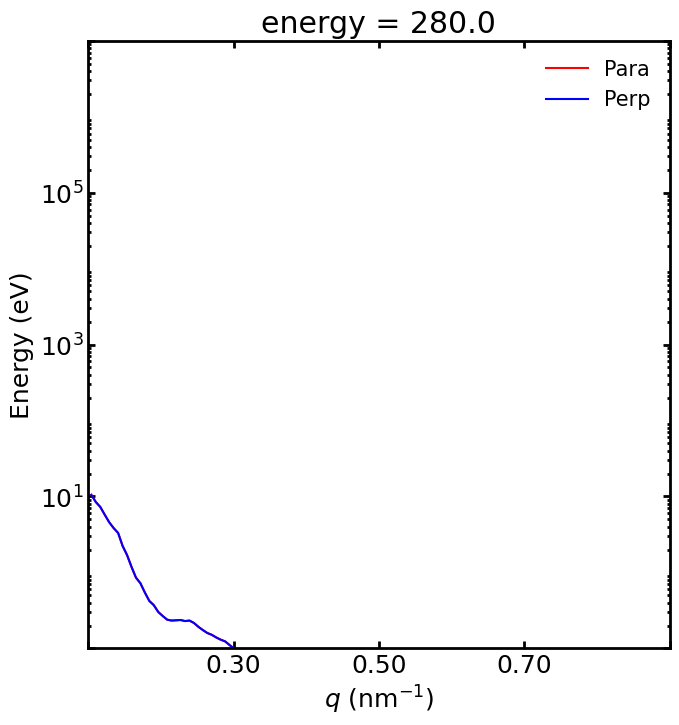

In [23]:
from Visualization.plot import plot_para_perp

plot_para_perp(para, perp)

In [11]:
def abc(a):
    print(a.dopant_orientation)
abc(p)

DopantOrientation.ISOTROPIC


0.6
